In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('qqq.xlsx', skiprows=10)

In [ ]:
df.head(10)

,№ п/п,№\nдокумента,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание,Примечание
0,1,WSR/1-838/2019,2019-04-09,208-409\n08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2,WSR/1-837/2019,2019-04-09,05-338\n09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,3,WSR/1-835/2019,2019-04-09,И10-14/3137\n09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,4,WSR/1-834/2019,2019-04-09,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,5,WSR/1-833/2019,2019-04-09,15-20/06-911\n08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN
5,6,WSR/1-831/2019,2019-04-09,Исх01/0403\n02.04.2019,Миронова С.В.,Островский А.В. (Губернатор Смоленской области),Вх - Об участии в Чемпионате мира по профессио...,NaN
6,7,WSR/1-830/2019,2019-04-09,24-2/10/В-1940\n14.03.2019,Уразов Р.Н.,Петрова С.В. (Министерство труда и социальной ...,"Вх - О направлении протокола ""О ходе реализаци...",NaN
7,8,WSR/1.6-832/2019,2019-04-09,08-04-21/1408\n08.04.2019,Тымчиков А.Ю.,"Соппа И.В. (ФГБОУ ВО ""Московский политехническ...",Вх - О согласовании дат проведения Вузовского ...,NaN
8,9,WSR/1-836/2019,2019-04-09,3571/19\n08.04.2019,Уразов Р.Н.,Бурганов Р.Т. (Министерство образования и наук...,О Национальном чемпионате 2019,NaN
9,10,WSR/1-829/2019,2019-04-08,05-337\n08.04.2019,Уразов Р.Н.,Черноскутова И.А. (Министерство просвещения Ро...,Вх - О проведении заседания министров образова...,NaN


Удаление ненужных атрибутов

In [ ]:
df = df.drop(columns=['№ п/п'], axis=1)
df = df.drop(columns=['Примечание'], axis=1)
df = df.drop(columns=['№\nдокумента'], axis=1)
df.head(10)

,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание
0,2019-04-09,208-409\n08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...
1,2019-04-09,05-338\n09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...
2,2019-04-09,И10-14/3137\n09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....
3,2019-04-09,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...
4,2019-04-09,15-20/06-911\n08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...
5,2019-04-09,Исх01/0403\n02.04.2019,Миронова С.В.,Островский А.В. (Губернатор Смоленской области),Вх - Об участии в Чемпионате мира по профессио...
6,2019-04-09,24-2/10/В-1940\n14.03.2019,Уразов Р.Н.,Петрова С.В. (Министерство труда и социальной ...,"Вх - О направлении протокола ""О ходе реализаци..."
7,2019-04-09,08-04-21/1408\n08.04.2019,Тымчиков А.Ю.,"Соппа И.В. (ФГБОУ ВО ""Московский политехническ...",Вх - О согласовании дат проведения Вузовского ...
8,2019-04-09,3571/19\n08.04.2019,Уразов Р.Н.,Бурганов Р.Т. (Министерство образования и наук...,О Национальном чемпионате 2019
9,2019-04-08,05-337\n08.04.2019,Уразов Р.Н.,Черноскутова И.А. (Министерство просвещения Ро...,Вх - О проведении заседания министров образова...


разбиение на атрибуты


In [ ]:
date = df['Исх. №\nДата'].str.split('\n', expand=True)
col = [2,3,4,5,6,7,8,9,10,11,12,13]
date.drop(columns=col, axis=1, inplace=True)
date.columns = ['Исх. №', 'Дата']
# adresat = df['Адресат'].str.split('\n')
# df = df.drop(columns=['Адресат'], axis=1)
df = pd.concat([df, date], axis=1)
# df = pd.concat([df, adresat], axis=1)
df = df.drop(columns=['Исх. №\nДата'], axis=1)
df

,Дата\nрегистрации,Адресат,Автор,Краткое\nсодержание,Исх. №,Дата
0,2019-04-09,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,208-409,08.04.2019
1,2019-04-09,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,05-338,09.04.2019
2,2019-04-09,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,И10-14/3137,09.04.2019
3,2019-04-09,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,Д2/7121-ИС,03.04.2019
4,2019-04-09,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,15-20/06-911,08.04.2019
...,...,...,...,...,...,...
4962,2017-11-01,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...,11,20.10.2017
4963,2017-11-01,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...,ТС-1164/06,31.10.2017
4964,2017-11-01,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,ЛО-95/06пр,None
4965,2017-11-01,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,ЛО-93/06пр,24.10.2017


организация

In [ ]:
org = df['Автор'].str.split('(', expand=True)
org[1] = org[1].map(lambda x: str(x)[:-1])
df['Автор'] = df['Автор'].str.split('(', expand=True)[0]
columns = [0,2,3,4,5,6,7,8]
org.drop(columns, inplace=True, axis=1)
org.columns = ['Организация']
qqq = pd.concat([df, org], axis=1)
qqq


,Дата\nрегистрации,Адресат,Автор,Краткое\nсодержание,Исх. №,Дата,Организация
0,2019-04-09,Уразов Р.Н.,Антонова С.В.,Вх - О возможности использования сетевого изда...,208-409,08.04.2019,АО «Интерфакс»
1,2019-04-09,Уразов Р.Н.,Картошкин С.А.,Вх - Об участии в совещании по вопросу доработ...,05-338,09.04.2019,Министерство просвещения Российской Федерации
2,2019-04-09,Уразов Р.Н.,Цивилев С.Е.,Вх - О командировании Саликовой К. и Глушко Д....,И10-14/3137,09.04.2019,Администрация Кемеровской области
3,2019-04-09,Иванюк Л.А.,Волков Г.А.,Вх - Об участии в Чемпионате мира по профессио...,Д2/7121-ИС,03.04.2019,Министерство транспорта Российской Федерации
4,2019-04-09,Уразов Р.Н.,Атанов И.В.,Вх - Об участии в церемонии открытия Вузовског...,15-20/06-911,08.04.2019,Ставропольский государственный аграрный универ...
...,...,...,...,...,...,...,...
4962,2017-11-01,Уразов Р.Н.,Медведев Д.А.,Протокол заседания Президиума Совета при Прези...,11,20.10.2017,Аппарат Правительства Российской Федерации
4963,2017-11-01,Уразов Р.Н.,Синюгина Т.Ю.,О проведении 21.11.2017 заседания организацион...,ТС-1164/06,31.10.2017,Министерство образования и науки РФ. Заместите...
4964,2017-11-01,Уразов Р.Н.,Огородова Л.М.,Протокол заседания рабочей группы приоритетног...,ЛО-95/06пр,None,Министерство образования и науки Российской Фе...
4965,2017-11-01,Уразов Р.Н.,Огородова Л.М.,Протокол заседания рабочей группы приоритетног...,ЛО-93/06пр,24.10.2017,Министерство образования и науки Российской Фе...


анализ текста

In [ ]:
# keys_word = ['содействии', 'предоставлении', 'возможности','предположительном количестве','брендировании','проведении','приглашении','участии', 'составе', 'сотрудничестве', 'замене', 'регистрации',
#              'обучении', 'допуске', 'включении', 'направлении', 'оказании', 'оплате']
# # s = qqq.Автор.values.tolist()
# list_final = []
# a = qqq['Краткое\nсодержание'].values.tolist()

# for i in a:
#     for j in keys_word:
#       if j in i:
#         list_final.append(j)
#         break
#       list_final.append(None)
# list_final
# qqq['analis'] = list_final
# s = qqq.Автор.values.tolist()
# qqq

#сессия 2

кол-во сообщений от авторов топ-5

```
# Выбран кодовый формат
```


```
# Выбран кодовый формат
```



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

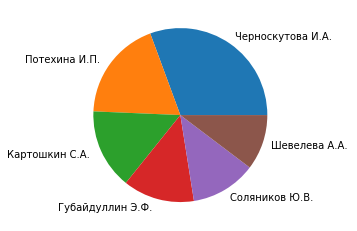

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
a = list(df['Автор'].value_counts()[0:6])
e = df['Автор'].value_counts()[0:6]
dict(e).keys()
fig, ax = plt.subplots()
ax.pie(a, labels=dict(e).keys())
plt

кол-во документов топ-6




<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

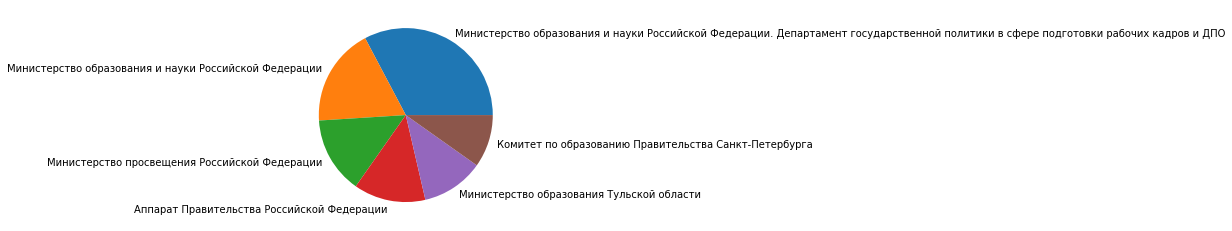

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
a = list(qqq['Организация'].value_counts()[0:6])
e = qqq['Организация'].value_counts()[0:6]
dict(e).keys()
fig, ax = plt.subplots()
ax.pie(a, labels=dict(e).keys())
plt

Количество отправленных писем адресатам

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

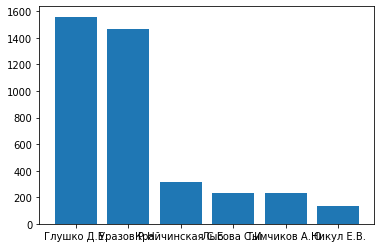

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
a = list(qqq['Адресат'].value_counts()[0:6])
e = qqq['Адресат'].value_counts()[0:6]
dict(e).keys()
fig, ax = plt.subplots()
ax.bar(dict(e).keys(), a)
plt

# Сессия 3

разделение датафрейма на обучение и тестирование

In [ ]:
from sklearn.model_selection import train_test_split
X = qqq['Организация'].values
y = qqq['Адресат'].values

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=1000)

Векторизация текста(представление в числовом формате)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
pickle.dump(vectorizer, open('vec.sav', 'wb'))

Алгоритм случайный лес показал точность ~ 55%

In [ ]:
# я выбрал алгорит случайный лес за его высокую точность и гибкость
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train) 
print(classifier.score(X_test, y_test))


0.5571658615136876


Алгоритм деревья показал точность ~ 54%

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train) 
print(classifier.score(X_test, y_test))


0.5394524959742351


Алгоритм опорных векторов показал точность ~ 47%

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly', degree=8)
classifier.fit(X_train, y_train) 
print(classifier.score(X_test, y_test))

0.4742351046698873


Алгоритм Градиентный бустинг показал точность ~ 50%

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(X_train, y_train)
clf.score(X_train, y_train)


0.500805152979066

Алгоритм Xgboost показал точность ~ 65%

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.6521739130434783


ручная проверка

In [ ]:
classifier.predict(X_test[8:9])[0], y_test[8]

('Уразов Р.Н.', 'Уразов Р.Н.')

Подборка различных фичей для повышения результата

In [ ]:
# в итоге я выбрал алгоритм Случайный лес
from sklearn.model_selection import train_test_split
# X = qqq['Автор'] + qqq['Краткое\nсодержание'] + qqq['Организация'] + qqq['Исх. №'] 
X = qqq['Краткое\nсодержание']

y = qqq['Адресат']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=1000)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10000)
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train) 
print(classifier.score(X_test, y_test))

# при добавлении фич Организация, Краткое содержание и Исходный номер точность модели выросла на ~ 13%
# я опробовал эти фичи на остальных алгоритмах у дерева решений точность выросла до ~ 61%, а у опорных векторв упала до 36 %, но при все этом
# лидирующем алгоритмом остается случайный лес с точностю около 70%

0.7004830917874396


In [ ]:
# небольшая визуализация, так сказать для самопроверки
for i in range(1, 10):
  print(classifier.predict(X_test[i:i+1])[0], ' '.join(str(y_test[i:i+1]).split()[1:3]))

Недоспасова О.В. Недоспасова О.В.
Уразов Р.Н. Уразов Р.Н.
Глушко Д.Е. Глушко Д.Е.
Митяева И.В. Митяева И.В.
Глушко Д.Е. Глушко Д.Е.
Глушко Д.Е. Глушко Д.Е.
Уразов Р.Н. Уразов Р.Н.
Уразов Р.Н. Уразов Р.Н.
Крайчинская С.Б. Крайчинская С.Б.


#Сессия 4

обучение модели по описанию

In [ ]:
# print('Введите описание входниго документа')
from sklearn.model_selection import train_test_split
# X = qqq['Автор'] + qqq['Краткое\nсодержание'] + qqq['Организация'] + qqq['Исх. №'] 
X = qqq['Краткое\nсодержание']
y = qqq['Адресат']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=1000)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10000)
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train) 
print(classifier.score(X_test, y_test))

0.6988727858293076


бот

In [ ]:
from pandas.core import series
from sklearn.feature_extraction.text import CountVectorizer

def get_adresat(descript):
  ser = pd.Series(data=descript)
  text = vectorizer.transform(ser)
  from sklearn.ensemble import RandomForestClassifier
  return classifier.predict(text)[0]

def mb_adresat(descript):
  ser = pd.Series(data=descript)
  text = vectorizer.transform(ser)
  from sklearn.ensemble import RandomForestClassifier
  return classifier.predict(text)[0], f'Вероятные адресаты - {classifier.predict_proba(text)}'

print('Чтобы определить адресата по описанию входного документа - %determine_addres\nЧтобы узнать справку по командам - %help\nЧтобы определить адресата по описанию входного документа на естественном языке - %determine_addres_natural_lang\nВыбрать одного или несколько наиболее вероятных адресатов - %maybe')
descript = input()
if descript == '%determine_addres_natural_lang':
  print('Введите команду на есттественном языке')
  print('Адресат - ' + str(get_adresat(input())))
if descript == '%maybe':
  print('Введите краткое описание документа: ')
  print('Адресат - ' + str(mb_adresat(input())))
if descript == '%help':
  print('Чтобы определить адресата по описанию входного документа - %determine_addres\n \
  Чтобы определить адресата по описанию входного документа на естественном языке - %determine_addres_natural_lang')
if descript == '%determine_addres':
  print('Введите краткое описание документа: ')
  print('Адресат - ' + str(get_adresat(input())))


Чтобы определить адресата по описанию входного документа - %determine_addres
Чтобы узнать справку по командам - %help
Чтобы определить адресата по описанию входного документа на естественном языке - %determine_addres_natural_lang
Выбрать одного или несколько наиболее вероятных адресатов - %maybe
%determine_addres
Введите краткое описание документа: 
Вх - О возможности использования сетевого издания "Информационный ресурс СПАРК" в работе Союза
Адресат - Уразов Р.Н.


# Сессия 5

установка *flask-restful*

In [ ]:
!pip install flask-restful

     |████████████████████████████████| 52 kB 1.4 MB/s 


импорты и создание объектов app и api

In [ ]:
from flask import Flask
from flask_restful import Api, Resource, reqparse
import random
app = Flask(__name__)
api = Api(app)

In [ ]:
class Api(Resource):
    def get(self):
        parser = reqparse.RequestParser()
        parser.add_argument("num_pp")
        parser.add_argument("num_doc")
        parser.add_argument("date_reg")
        parser.add_argument("orig_date")
        parser.add_argument("ather")
        parser.add_argument("summary")
        parser.add_argument("prim")
        params = parser.parse_args()
        quote = {
            "num_pp": params["num_pp"],
            "num_doc": params["num_doc"],
            "date_reg": params["date_reg"],
            "orig_date": params["orig_date"],
            "ather": params["ather"],
            "summary": params["summary"],
            "prim": params["prim"]
            }
        return quote, 200

#https://5000-cs-534459886760-default.cs-europe-west4-bhnf.cloudshell.dev/ai-quotes/?a=1
api.add_resource(Api, "/get-addressee", "/get-addressee/", "/get-addressee/")
if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
import requests
!curl 'https://5000-cs-534459886760-default.cs-europe-west4-bhnf.cloudshell.dev/get-addressee/?summary=%D0%92%D1%85%20-%20%D0%9E%20%D0%B2%D0%BE%D0%B7%D0%BC%D0%BE%D0%B6%D0%BD%D0%BE%D1%81%D1%82%D0%B8%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F%20%D1%81%D0%B5%D1%82%D0%B5%D0%B2%D0%BE%D0%B3%D0%BE%20%D0%B8%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D1%8F%20%22%D0%98%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9%20%D1%80%D0%B5%D1%81%D1%83%D1%80%D1%81%20%D0%A1%D0%9F%D0%90%D0%A0%D0%9A%22%20%D0%B2%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B5%20%D0%A1%D0%BE%D1%8E%D0%B7%D0%B0?num_pp=1&ather=%D0%90%D0%BD%D1%82%D0%BE%D0%BD%D0%BE%D0%B2%D0%B0%20%D0%A1.%D0%92.%20(%D0%90%D0%9E%20%C2%AB%D0%98%D0%BD%D1%82%D0%B5%D1%80%D1%84%D0%B0%D0%BA%D1%81%C2%BB)&num_doc=208-40908.04.2019&orig_date=WSR/1-838/2019'


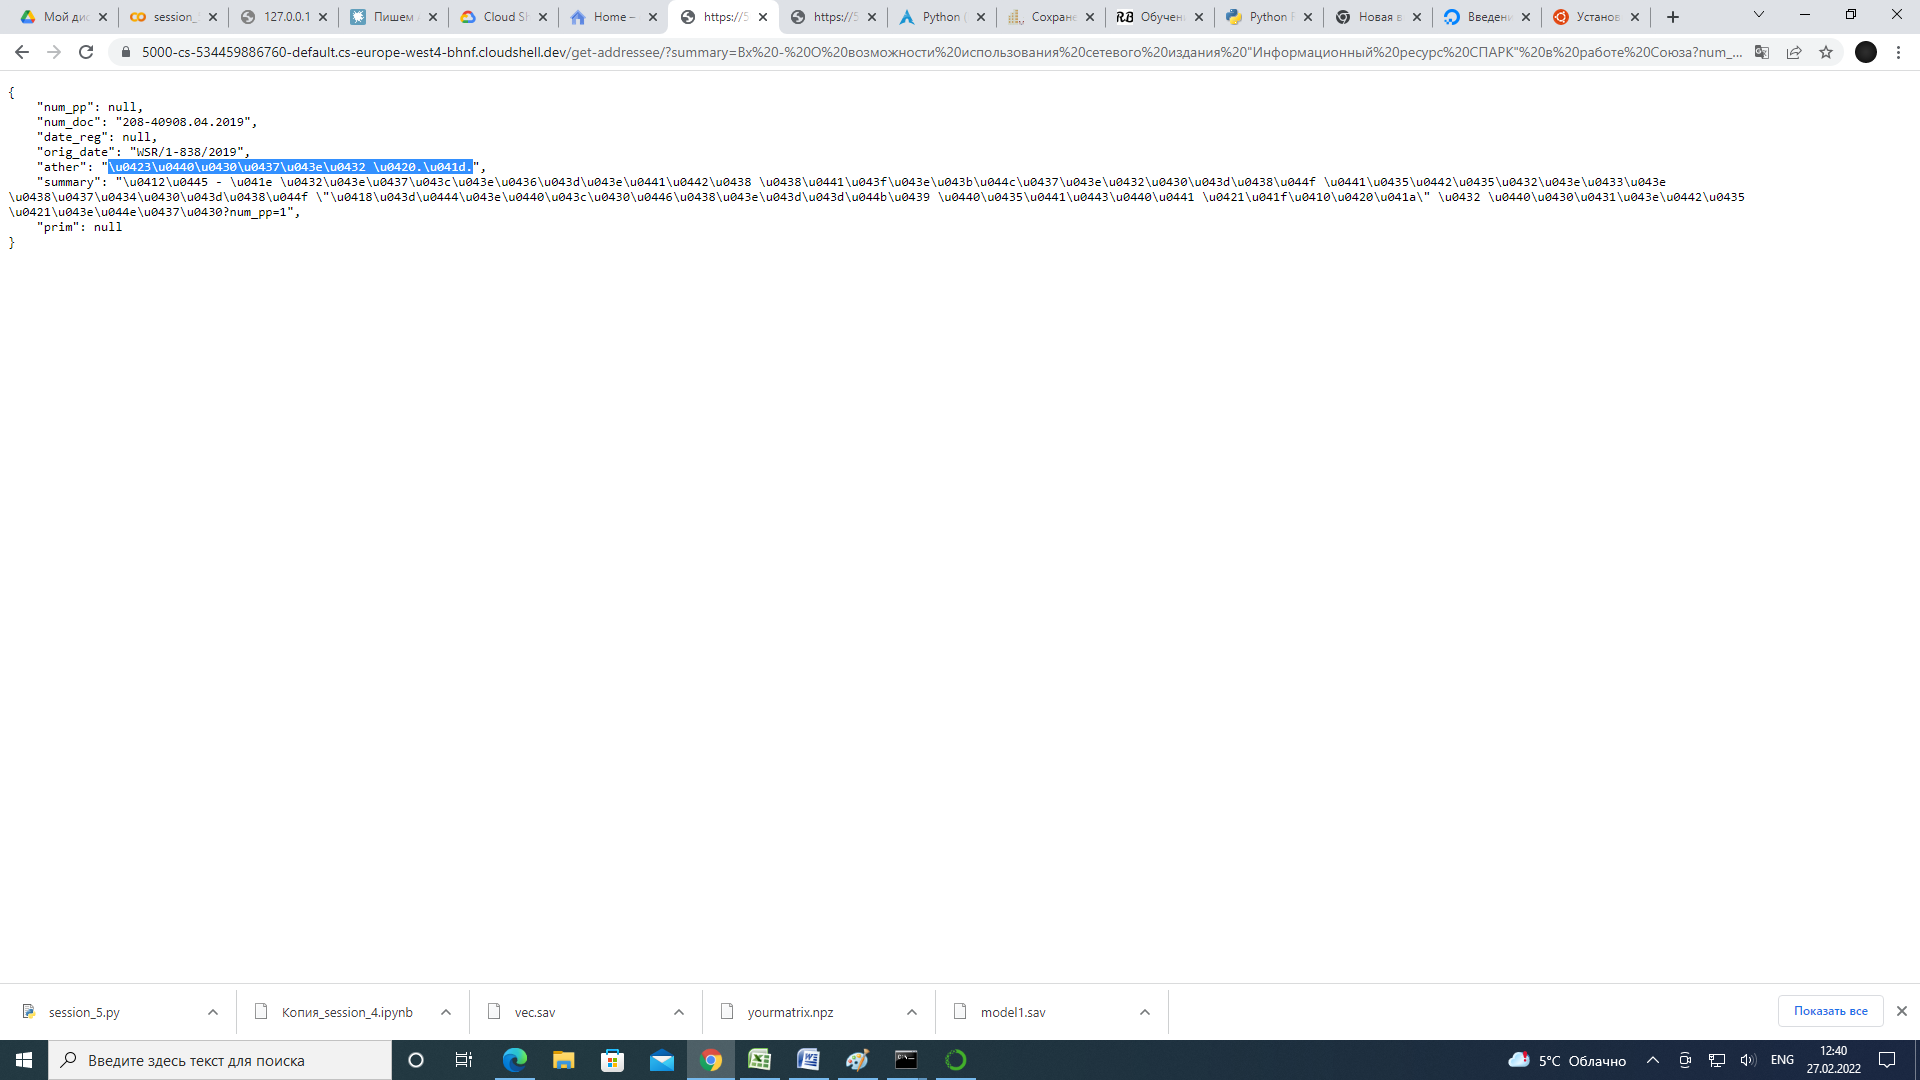

In [ ]:

# !pip install cPickle
# with open('test_sparse_array.dat', 'wb') as outfile:
#     pickle.dump(X_train, outfile, pickle.HIGHEST_PROTOCOL)
# import cPickle as pickle

# with open('(test_sparse_array.dat', 'rb') as infile:
#     x = pic)kle.load(infile)
# your_matrix_back = sparse.load_npz("yourmatrix.npz")



0.6988727858293076
